# Breast cancer prediction.

## Problem description
### The dataset contains sample measurements of breast dimensions. 
### The task is to predict the diagnosis. (M) for Malignant and (B) for Benign

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Import the dataset

In [89]:
data=pd.read_csv('data.csv')

In [90]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [91]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [92]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### Drop the empty column 'Unnamed:32'

In [93]:
data.drop(['Unnamed: 32'], axis=1,inplace=True)

In [94]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### To get the number of Malignant and Benign diagnosis

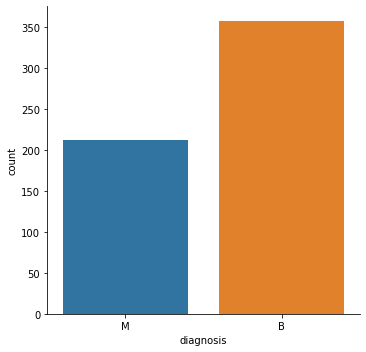

In [95]:
sns.factorplot('diagnosis', data=data, kind='count')

In [96]:
data.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

### Reduce hyper-correlation between features

In [97]:
corr=data.corr()

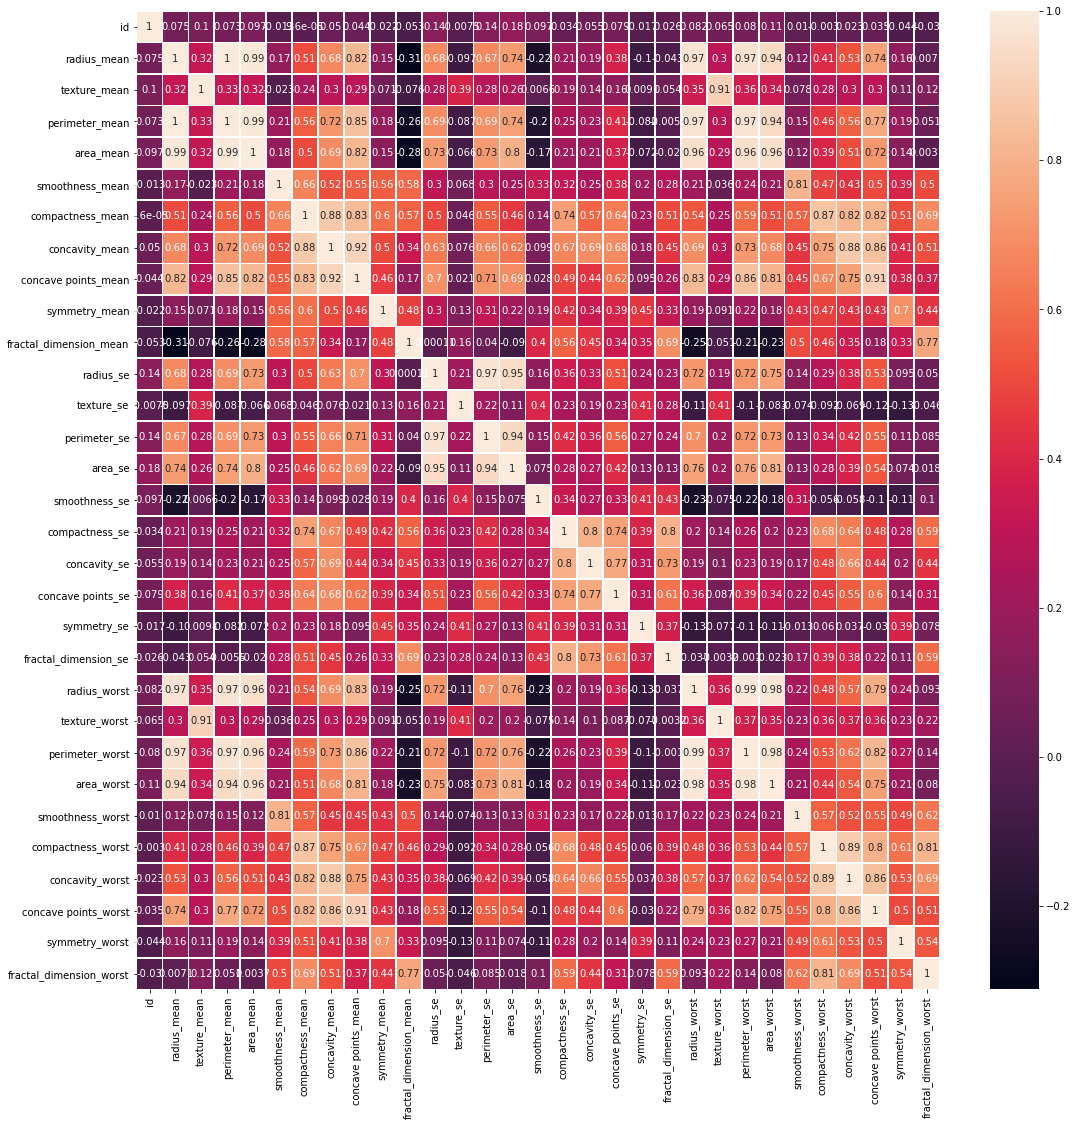

In [98]:
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=True, linewidth=0.7)

In [99]:
data=data.drop(['id','radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst','perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se','concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se'], axis=1)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

### One-hot encoding of the target variable

In [100]:
ohe=OneHotEncoder(sparse=False)

In [101]:
ohe.fit_transform(data[['diagnosis']])

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [102]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['diagnosis']), remainder='passthrough')

In [103]:
ohe.categories_

[array(['B', 'M'], dtype=object)]

### Define the input variables (X) and the target variable (y)

In [104]:
X=data.drop('diagnosis', axis=1)

In [105]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115


In [106]:
y=data['diagnosis'].map({'M':1,'B':0})

In [107]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## Machine learning with unscaled data
### KNeighboursclassifier
### Logistic regression
### Random forest
### Decision tree
### Naive Bayes algorithm
### Support vector machine

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [130]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_knn))

0.8421052631578947


In [131]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_logreg))

0.8771929824561403


In [132]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_rf))

0.9210526315789473


In [133]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print(metrics.accuracy_score(y_pred_dt,y_test))

0.8333333333333334


In [134]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print(metrics.accuracy_score(y_pred_nb,y_test))

0.9035087719298246


In [136]:
svc = svm.SVC()
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
print(metrics.accuracy_score(y_pred_svc,y_test))

0.8333333333333334


In [137]:
print('K NEAREST NEIGHBOURS:: ',metrics.accuracy_score(y_pred_knn,y_test))

print('LOGISTIC REGRESSION:: ',metrics.accuracy_score(y_pred_logreg,y_test))

print('RANDOM FORSEST CLASSIFICATION:: ',metrics.accuracy_score(y_pred_rf,y_test))

print('DECISION TREE CLASSIFIER:: ',metrics.accuracy_score(y_pred_dt,y_test))

print('NAIVE BAYES ALGORITHM:: ',metrics.accuracy_score(y_pred_nb,y_test))

print('SUPPORT VECTOR MACHINE:: ',metrics.accuracy_score(y_pred_svc,y_test))

K NEAREST NEIGHBOURS::  0.8421052631578947
LOGISTIC REGRESSION::  0.8771929824561403
RANDOM FORSEST CLASSIFICATION::  0.9210526315789473
DECISION TREE CLASSIFIER::  0.8333333333333334
NAIVE BAYES ALGORITHM::  0.9035087719298246
SUPPORT VECTOR MACHINE::  0.8333333333333334


### The beat algorithm for unscaled data is the Random forest lassifier

## Machine learning with scaled data
### KNeighboursclassifier
### Logistic regression
### Random forest
### Decision tree
### Naive Bayes algorithm
### Support vector machine

In [138]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [139]:
xtrain,xtest,ytrain,ytest = train_test_split(X_sc,y,test_size = 0.2,random_state = 1)

In [140]:
knn1 = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(xtrain,ytrain)
ypred_knn = knn1.predict(xtest)
print(metrics.accuracy_score(ypred_knn,ytest))

0.9210526315789473


In [141]:
logreg1=LogisticRegression()
logreg1.fit(X_train,y_train)
ypred_logreg=logreg1.predict(X_test)
print(metrics.accuracy_score(ypred_logreg,ytest))

0.8771929824561403


In [142]:
rf1=RandomForestClassifier(n_estimators=100)
rf1.fit(xtrain,ytrain)
ypred_rf=rf1.predict(xtest)
print(metrics.accuracy_score(ypred_rf,ytest))

0.9298245614035088


In [143]:
dt1 = DecisionTreeClassifier()
dt1.fit(xtrain,ytrain)
ypred_dt = dt1.predict(xtest)
print(metrics.accuracy_score(ypred_dt,ytest))

0.8333333333333334


In [144]:
nb1 = GaussianNB()
nb1.fit(xtrain,ytrain)
ypred_nb = nb1.predict(xtest)
print(metrics.accuracy_score(ypred_nb,ytest))

0.9035087719298246


In [145]:
svc1 = svm.SVC()
svc1.fit(xtrain,ytrain)
ypred_svc=svc1.predict(xtest)
print(metrics.accuracy_score(ypred_svc,ytest))

0.9122807017543859


In [128]:
print('K NEAREST NEIGHBOURS:: ',metrics.accuracy_score(ypred_knn,ytest))

print('LOGISTIC REGRESSION::',metrics.accuracy_score(ypred_logreg,ytest))

print('RANDOM FORSEST CLASSIFICATION:: ',metrics.accuracy_score(ypred_rf,ytest))

print('DECISION TREE CLASSIFIER:: ',metrics.accuracy_score(ypred_dt,ytest))

print('NAIVE BAYES ALGORITHM:: ',metrics.accuracy_score(ypred_nb,ytest))

print('SUPPORT VECTOR MACHINE:: ',metrics.accuracy_score(ypred_svc,ytest))

K NEAREST NEIGHBOURS::  0.9210526315789473
LOGISTIC REGRESSION:: 0.5175438596491229
RANDOM FORSEST CLASSIFICATION::  0.9210526315789473
DECISION TREE CLASSIFIER::  0.8245614035087719
NAIVE BAYES ALGORITHM::  0.9035087719298246
SUPPORT VECTOR MACHINE::  0.9122807017543859


### The best algorithm for scaled data is K nearest neighbours and Random forest classifier